# Codealong: PCA, Pipelines & Model persistance

PCA technique is particularly useful in processing data where multi-colinearity exists between the features/variables. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create dataset (500 columns)

In [ ]:
np.random.seed(123) 

scale_values = np.logspace(1, 5, num=500)


# Build a classification task using n informative features
X, y = make_classification(n_samples=5000, n_features=500, n_informative=280,
                           n_redundant=180, n_repeated=3, n_classes=6, flip_y=0.1,
                           weights=[0.1, 0.2, 0.15, 0.25, 0.05], n_clusters_per_class=1, 
                           scale = scale_values, random_state=42)
X = pd.DataFrame(X)
y = pd.DataFrame(y)

X = X.add_prefix("feature_")
y.rename(columns={0:"label"}, inplace=True)

codealong_df = pd.concat([X, y], axis=1)

In [ ]:
codealong_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_491,feature_492,feature_493,feature_494,feature_495,feature_496,feature_497,feature_498,feature_499,label
0,546.461786,183.133455,-1150.019904,5298.050018,7.500523,-12686.970903,-112.493055,-6454.026044,531.516576,8286.286189,...,84825.221561,9.113082e+04,250071.359242,-2179.913994,1.735737e+06,-682.006209,5.650028e+05,77440.968239,141.732437,0
1,115.181234,-29.869580,795.332340,8244.577935,-64.074786,-19420.478839,-238.176417,3647.286876,182.115829,20722.386033,...,-114272.011298,8.881889e+05,937548.602218,5918.908160,3.744031e+06,39.411762,-2.249651e+06,-67770.592700,-585.884028,5
2,-147.513125,281.080058,-1222.085313,-6849.251819,-55.386172,3319.185198,-327.471273,12314.675892,-5.609710,14339.872593,...,887342.520120,-4.062938e+05,-248168.834620,-7958.639803,-4.361475e+06,-257.724275,3.107987e+05,50104.604844,-225.926753,5
3,91.062226,-87.201281,-83.549423,-177.823199,-144.197687,-16616.398077,30.904988,-994.430982,-418.581383,2179.844249,...,-286938.774096,-2.493297e+06,-58026.544280,7673.429635,-3.175762e+05,1339.701934,-4.014052e+05,9414.605559,510.005904,2
4,-222.887856,-128.185634,-1054.410539,-4039.340623,113.384258,-100.535098,-225.664434,-4691.428044,-212.522834,-25966.053643,...,338399.469401,-3.899652e+06,501438.458669,1375.408163,-4.624358e+06,-977.193223,7.671711e+05,3707.134463,378.345297,3


## Train-test split

In [ ]:
train_set, test_set = train_test_split(codealong_df,
                                       test_size=0.2,
                                       random_state=123)

train_X = train_set.drop(columns="label")
train_y = train_set["label"]

test_X = test_set.drop(columns="label")
test_y = test_set["label"]

## Pre-processing

In [ ]:
# copy of train_X and test_X
train_X_original = train_X.copy()
test_X_original = test_X.copy()

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initiate transformer
train_X = scaler.fit_transform(train_X) # scale data
test_X = scaler.transform(test_X) # scale test set

## Modelling (iteration 1)

In [ ]:
# libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint
import time

In [ ]:
start_time = time.time()
neigh1 = KNeighborsClassifier()

param_distribs={"n_neighbors": randint(low=3, high=30),
                "weights":["uniform", "distance"],
                "p":[1,2]}

neigh1_search = RandomizedSearchCV(neigh1,
                                   param_distribs,
                                   scoring="accuracy",
                                   n_iter=50,
                                   cv=5,
                                   n_jobs=4,
                                   random_state=123)

neigh1_search.fit(train_X, train_y)

print("--- %s seconds ---" % (time.time() - start_time))
print(round(neigh1_search.best_score_, 2))

--- 140.0651183128357 seconds ---
0.81


In [ ]:
%%time

print("status")

status
CPU times: user 609 µs, sys: 0 ns, total: 609 µs
Wall time: 525 µs


## PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10) # pick number of components 
X_reduced = pca.fit_transform(train_X)

In [ ]:
X_reduced.shape

(4000, 10)

In [ ]:
pd.DataFrame(X_reduced)

,0,1,2,3,4,5,6,7,8,9
0,0.474378,1.495384,-1.384758,1.224221,1.379756,-1.232562,2.042062,-1.166930,0.342210,-1.346279
1,-2.146726,2.564888,0.971586,1.974589,3.133925,-4.089445,0.838593,3.831320,2.346459,2.099490
2,2.774196,-1.471876,3.468066,-0.888831,0.948576,-2.187903,0.492279,-1.248252,4.510785,0.156791
3,-3.195604,-0.443886,0.614868,0.224578,-2.056785,-0.243281,-2.404725,-3.118202,-1.996840,-0.486170
4,-1.499912,8.937619,2.732485,-0.214050,0.279504,0.567841,0.870891,-1.887281,-3.260786,-1.141677
...,...,...,...,...,...,...,...,...,...,...
3995,-0.190452,-1.297502,-2.219376,0.659012,0.466514,1.386602,0.861127,-2.158350,0.759139,-1.415586
3996,1.857409,-1.865625,-0.534807,0.975394,-0.587814,2.583903,1.167899,-0.744895,1.847040,-1.674240
3997,0.057728,0.913060,-1.688635,-0.940390,0.014636,2.678467,0.445060,-2.445845,1.655947,0.000635
3998,2.523335,0.426509,-1.615941,2.110021,2.962678,-2.247488,0.524154,-0.560574,0.376524,0.344047


## Modelling (iteration 2)

In [ ]:
start_time = time.time()
neigh2 = KNeighborsClassifier()

neigh2_search = RandomizedSearchCV(neigh2,
                                   param_distribs,
                                   scoring="accuracy",
                                   n_iter=50,
                                   cv=5,
                                   n_jobs=4,
                                   random_state=123)

neigh2_search.fit(X_reduced, train_y)

print("--- %s seconds ---" % (time.time() - start_time))
print(round(neigh2_search.best_score_, 2))

--- 15.746641397476196 seconds ---
0.29


### Picking the right number of components

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None) # pick number of components
X_reduced = pca.fit_transform(train_X)

In [ ]:
np.round(pca.explained_variance_ratio_, 4)*100

array([1.12, 1.04, 1.01, 0.99, 0.97, 0.93, 0.93, 0.92, 0.91, 0.89, 0.88,
       0.87, 0.86, 0.85, 0.84, 0.82, 0.81, 0.8 , 0.78, 0.78, 0.77, 0.76,
       0.75, 0.74, 0.73, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68, 0.67, 0.66,
       0.66, 0.65, 0.64, 0.64, 0.63, 0.62, 0.62, 0.6 , 0.6 , 0.59, 0.59,
       0.58, 0.58, 0.57, 0.57, 0.56, 0.55, 0.55, 0.55, 0.54, 0.54, 0.53,
       0.53, 0.52, 0.52, 0.52, 0.51, 0.51, 0.5 , 0.49, 0.49, 0.49, 0.48,
       0.47, 0.47, 0.47, 0.46, 0.46, 0.45, 0.45, 0.44, 0.44, 0.43, 0.43,
       0.43, 0.42, 0.42, 0.42, 0.41, 0.41, 0.41, 0.4 , 0.4 , 0.4 , 0.39,
       0.39, 0.39, 0.38, 0.38, 0.37, 0.37, 0.37, 0.37, 0.37, 0.36, 0.36,
       0.35, 0.35, 0.35, 0.34, 0.34, 0.33, 0.33, 0.33, 0.33, 0.33, 0.32,
       0.32, 0.32, 0.32, 0.31, 0.31, 0.31, 0.31, 0.31, 0.3 , 0.3 , 0.3 ,
       0.3 , 0.29, 0.29, 0.29, 0.29, 0.29, 0.28, 0.28, 0.28, 0.28, 0.28,
       0.27, 0.27, 0.27, 0.27, 0.27, 0.27, 0.26, 0.26, 0.26, 0.26, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.24, 0.

In [ ]:
# compute the cumulative sum of explained variance ratio

# create a plot to visualize the cumulative sum of explained variance
# as the number of principal components increases

# How much variance do you want to keep in the data?
# How many components (dimensions) should you drop, considering computing power, the curse of dimensionality, overfitting..?

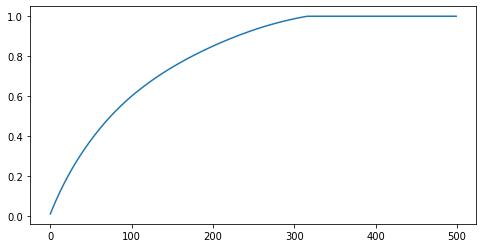

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(cumsum, label = "Explained variance");

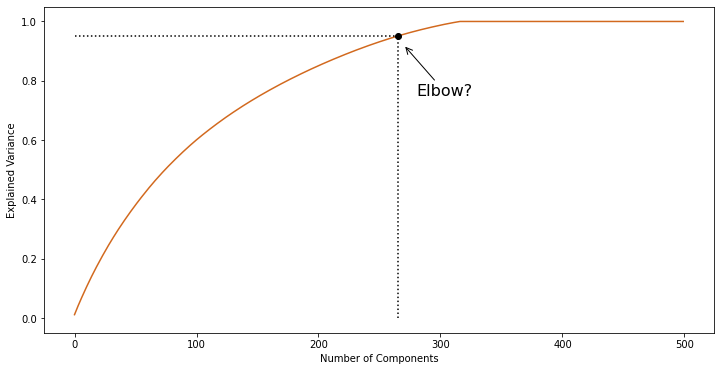

In [ ]:
import matplotlib.pyplot as plt

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)

# create first figure and ax
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(cumsum, label = "Explained variance", c="chocolate")

ax.annotate("Elbow?", xy=(270, 0.92), xytext=(280, 0.75),
             arrowprops=dict(arrowstyle="->"), fontsize=16)

ax.plot([d, d], [0, 0.95], "k:")
ax.plot([0, d], [0.95, 0.95], "k:")
ax.plot(d, 0.95, "ko")

ax.set_ylabel("Explained Variance")
ax.set_xlabel("Number of Components");

# Pre-processing + model pipeline

`make_pipeline()` is almost identical to `Pipeline()`: you can call as many transformers as you want (you don't even need to initialize them before) sequentially. Then, you can use fit(), transform() or fit_transform() as if it was only a single transformer.

`make_pipeline()` does't require explicit naming of the steps (generates the names automatically) - it can be used when we don't care about the names and simply want to create a quick pipeline.

In both cases, a model can be added at the end of the pipeline. You can then call the `fit()` method to the pipeline to apply all the transformations and fit the model, passing the X and y of the training set as arguments.

A pipeline with a model also has the `predict()` method available. Passing an X to that method (either the train or the test) will transform the data and output predictions.

#### Pre-processing pipeline

In [ ]:
train_X_2 = train_X_original.copy()
test_X_2 = test_X_original.copy()

In [ ]:
from sklearn.pipeline import make_pipeline

param_distribs={"n_neighbors": randint(low=3, high=30),
                "weights":["uniform", "distance"],
                "p":[1,2]}

neigh3_search = RandomizedSearchCV(KNeighborsClassifier(),
                                   param_distribs,
                                   scoring="accuracy",
                                   n_iter=50,
                                   cv=5,
                                   n_jobs=4,
                                   random_state=123)


model_pipeline = make_pipeline(StandardScaler(),
                                 PCA(n_components=0.95),
                                 neigh3_search)

In [ ]:
model_pipeline.fit(train_X_2, train_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('randomizedsearchcv',
                 RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                                    n_iter=50, n_jobs=4,
                                    param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3bbf3fa910>,
                                                         'p': [1, 2],
                                                         'weights': ['uniform',
                                                                     'distance']},
                                    random_state=123, scoring='accuracy'))])

You can still access the randomized search cv scores, parameters...

In [ ]:
model_pipeline["randomizedsearchcv"].best_score_

0.8192499999999999

In [ ]:
model_pipeline["randomizedsearchcv"].best_params_

{'n_neighbors': 28, 'p': 2, 'weights': 'uniform'}

### Cross validation: tuning the parameters in the pipeline

Some transformers in the pipeline

In [ ]:
train_X_3 = train_X_original.copy()
test_X_3 = test_X_original.copy()

In [ ]:
from sklearn.pipeline import Pipeline

model_pipeline = Pipeline([("scaler", StandardScaler()),
                          ("pca", PCA()),
                          ("neigh", KNeighborsClassifier())])

param_grid = {
    "pca__n_components": [10, 30, 50, 100],
    "neigh__n_neighbors": [3, 15, 50, 80, 150]
}

In [ ]:
neigh3_search = RandomizedSearchCV(model_pipeline,
                                   param_grid,
                                   scoring="accuracy",
                                   n_iter=10,
                                   cv=5,
                                   n_jobs=4,
                                   random_state=123)

In [ ]:
neigh3_search.fit(train_X_3, train_y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA()),
                                             ('neigh',
                                              KNeighborsClassifier())]),
                   n_jobs=4,
                   param_distributions={'neigh__n_neighbors': [3, 15, 50, 80,
                                                               150],
                                        'pca__n_components': [10, 30, 50, 100]},
                   random_state=123, scoring='accuracy')

In [ ]:
neigh3_search.best_params_

{'neigh__n_neighbors': 150, 'pca__n_components': 100}

In [ ]:
neigh3_search.best_score_

0.7137499999999999

## Practice: 

- Apply PCA to the Diamonds dataset.
- Apply PCA to the Housing case study Pipeline.

In both cases, tune the number of components and analyse whether the performance improves, stays stable or decreases.